In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from xgboost import XGBClassifier

train = pd.read_csv(r"./Data/Result.csv")

In [2]:
def Min_Max_Normalization(feature):
    Data_max = max(feature)
    Data_min = min(feature)
    return (feature-Data_min)/(Data_max-Data_min)

def Plot_confusion(y_true, y_pred):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()
    
train['Administrative'] = Min_Max_Normalization(train['Administrative'])
train['Administrative_Duration'] = Min_Max_Normalization(train['Administrative_Duration'])
train['Informational'] = Min_Max_Normalization(train['Informational'])
train['Informational_Duration'] = Min_Max_Normalization(train['Informational_Duration'])
train['ProductRelated'] = Min_Max_Normalization(train['ProductRelated'])
train['ProductRelated_Duration'] = Min_Max_Normalization(train['ProductRelated_Duration'])

train = train.astype({
    "Month":'int',
    "OperatingSystems":'int',
    "Browser":'int',
    "Region":'int',
    "TrafficType":'int',
    "VisitorType":'int',
    "Weekend":'int',
    "Revenue":'bool'
})

train = train.drop(['ID'],axis=1)
Data = train.drop(["Revenue"], axis=1)
Target = train['Revenue']
X_train, X_test, y_train, y_test = train_test_split(Data, Target,test_size=0.2,random_state=0)

C:\Users\Ray\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Acc. 0.9024088943792464
Rec. 0.5814814814814815


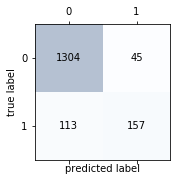

In [3]:
xgb = XGBClassifier(
    learning_rate=0.1, 
    max_depth=9, 
    subsample=1,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='error'
)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print("Acc.",accuracy_score(y_test, y_pred))
print("Rec.",recall_score(y_test, y_pred))
Plot_confusion(y_test, y_pred)

In [4]:
test = pd.read_csv(r"./Data/test.csv")

test['Administrative'] = Min_Max_Normalization(test['Administrative'])
test['Administrative_Duration'] = Min_Max_Normalization(test['Administrative_Duration'])
test['Informational'] = Min_Max_Normalization(test['Informational'])
test['Informational_Duration'] = Min_Max_Normalization(test['Informational_Duration'])
test['ProductRelated'] = Min_Max_Normalization(test['ProductRelated'])
test['ProductRelated_Duration'] = Min_Max_Normalization(test['ProductRelated_Duration'])

In [5]:
test.describe()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,4491.621111,0.134444,0.046556,0.033611,0.025767,0.097989,0.084058,0.021056,0.041494,6.990629,0.063333,4.864444,2.268889,7.832222,2.614444,7.601111,1.847778,0.220000
std,2571.975086,0.181745,0.090360,0.082692,0.093835,0.128696,0.118385,0.047337,0.047904,20.153000,0.204591,3.140652,1.684493,3.307333,2.663395,4.058499,0.371609,0.414477
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2339.000000,0.000000,0.000000,0.000000,0.000000,0.023739,0.012924,0.000000,0.013071,0.000000,0.000000,2.000000,1.000000,3.000000,0.000000,4.000000,2.000000,0.000000
50%,4460.500000,0.055556,0.009971,0.000000,0.000000,0.053412,0.042710,0.002674,0.023856,0.000000,0.000000,5.000000,1.000000,10.000000,2.000000,7.000000,2.000000,0.000000
75%,6634.250000,0.222222,0.056086,0.000000,0.000000,0.121662,0.107667,0.015385,0.046667,0.000000,0.000000,8.000000,3.000000,10.000000,6.000000,12.000000,2.000000,0.000000
max,8978.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200000,0.200000,167.230834,1.000000,9.000000,7.000000,11.000000,8.000000,19.000000,2.000000,1.000000


In [6]:
test = test.astype({
    "Month":'int',
    "OperatingSystems":'int',
    "Browser":'int',
    "Region":'int',
    "TrafficType":'int',
    "VisitorType":'int',
    "Weekend":'int'
})

test_ID = test['ID']
test_pre = test.drop(['ID'],axis=1)

In [7]:
y_pred=xgb.predict(test_pre)

In [8]:
y_pred = pd.DataFrame(y_pred, columns=['HasRevenue'])
Answer = pd.concat([test_ID,y_pred],axis=1)

In [9]:
Answer = Answer.sort_values(by=['ID'])

In [10]:
Answer.to_csv('./Data/Answer.csv',index=0)